In [1]:
# Random Forest is an ensemble classifier made using many decision tree models.
# Ensemble models combine the results from different models.
# Random forest uses fraction of a number of rows is selected at random and a particular number of features are selected at random to view on and a decision tree is build on this subset.

In [2]:
# Step 1: Importing the important libraries
"""
1. NumPy: is a general-purpose array-processing package and scientific computing package.
2. Pandas: is an open source package widely used for data science/data analysis and machine learning tasks.
3. Matplotlib: is a cross-platform, data visualization and graphical plotting library and its numerical extension NumPy.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Step 2: Read the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
# Step 2.1: Exploration of the dataset
# Check the head of the dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Step 2.2: Exploration of the dataset
# Check the tail of the dataset
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
# Step 2.3: Exploration of the dataset
# Check the decoration of the dataset
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
# Step 3: Seperating the dataset into the dependent (y) and independent (x) varialbes
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [8]:
# Step 4: Spliting of the dataset into the training and test subsets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3, random_state = 0)

In [9]:
# Step 5: Data Preprocessing: Feature Scaling concept: Overcome the overfit values from the dataset.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [10]:
# Step 6: Init the Model and then apply the algo with the dataset. model : Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [11]:
# Step 7: To predict the output or dependent values over the test data through the learning model.
y_pred = classifier.predict(X_test)

In [12]:
# Step 8: Print and compare the test actual values and the predicted values through the model
y_pred, y_test

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64))

In [13]:
# Step 9: Lets Compute the confusion matrix, accuracy score, classification report through library
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print('The confusion matrix of the model:')
print(cm)
acc = accuracy_score(y_test,y_pred)
print('The accuracy score of the model:',acc)
cr = classification_report(y_test,y_pred)
print('The classification report of the model:')
print(cr)

The confusion matrix of the model:
[[74  5]
 [ 7 34]]
The accuracy score of the model: 0.9
The classification report of the model:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        79
           1       0.87      0.83      0.85        41

    accuracy                           0.90       120
   macro avg       0.89      0.88      0.89       120
weighted avg       0.90      0.90      0.90       120



In [14]:
# Step 9.1: Lets Compute the accuracy score and other performance metrices using sketch formulas
# A true positive: is an outcome where the model correctly predicts the positive class.
# A true negative: is an outcome where the model correctly predicts the negative class.
# A false positive: is an outcome where the model incorrectly predicts the positive class. 
# A false negative: is an outcome where the model incorrectly predicts the negative class.
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

In [15]:
print(cm)
print('True positive: ',TP)
print('True negative: ',TN)
print('False positive: ',FP)
print('False negative: ',TN)

[[74  5]
 [ 7 34]]
True positive:  74
True negative:  34
False positive:  5
False negative:  34


In [16]:
# Step 9.2: Lets Compute the following;
# Accuracy: is the fraction of predictions our model got right. (TP + TN)/(TP + FP + TN + FN)
# Precision: provides what proportion of positive identifications was actually correct? (TP)/(TP + FP)
# Recall: provides what proportion of actual positives was identified correctly? (TP)/(TP + FN)
print('The accuracy of the model is: ',(TP + TN)/(TP + FP + TN + FN))
print('Precision or Positive Predictive Value of the model is: ',(TP)/(TP + FP))
print('Sensitivity, Recall, Hit rate, or True Positive Rate of the model is: ',(TP)/(TP + FN))
print('Specificity, Selectivity or True Negative Rate of the model is: ',(TN)/TN + FP)
print('Negative Predictive Value of the model is: ',(TN)/(TN + FN))
print('Miss rate or False Negative Rate of the model is: ',(FN)/(FN + FP))
print('Fall-out or False Positive Rate of the model is: ', (FP)/(FP + TN))
print('False Discovery Rate of the model is: ', (FP)/(FP + TP))
print('False Omission Rate of the model is: ', (FN)/(FN + TN))

The accuracy of the model is:  0.9
Precision or Positive Predictive Value of the model is:  0.9367088607594937
Sensitivity, Recall, Hit rate, or True Positive Rate of the model is:  0.9135802469135802
Specificity, Selectivity or True Negative Rate of the model is:  6.0
Negative Predictive Value of the model is:  0.8292682926829268
Miss rate or False Negative Rate of the model is:  0.5833333333333334
Fall-out or False Positive Rate of the model is:  0.1282051282051282
False Discovery Rate of the model is:  0.06329113924050633
False Omission Rate of the model is:  0.17073170731707318


0.8829885767212102


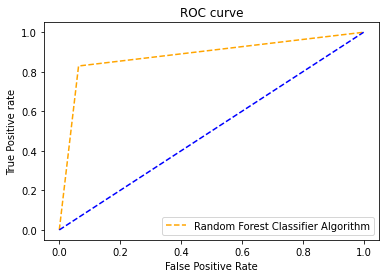

In [17]:
# Step 10: ROC (receiver operating characteristic) Curve: is a graph showing the performance of a classification model at all classification thresholds.
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier Algorithm')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


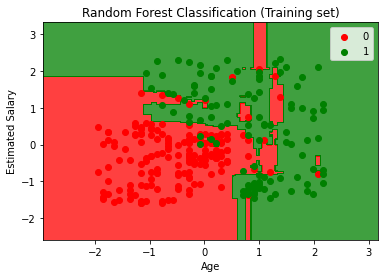

In [18]:
# Step 11: Visualizing the Random Forest Classifier Algorithm results over the training dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


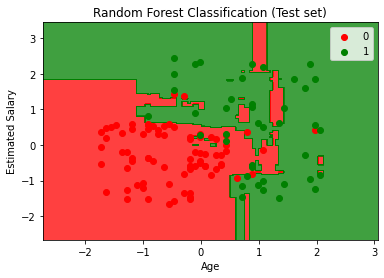

In [19]:
# Step 11.1: Visualizing the Test Set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [20]:
print('Congratulation: Task accomplished to design a Random Forest Classifier Algorithm model based on customer age and salary background.')

Congratulation: Task accomplished to design a Random Forest Classifier Algorithm model based on customer age and salary background.
